In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay

In [192]:
import warnings
warnings.filterwarnings("ignore")

In [193]:
Data = pd.read_csv('D://D/ماشین لرنینگ/train.csv')
Data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [194]:
df = pd.DataFrame(Data)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [195]:
df.describe(include = 'all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [197]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [198]:
# preprocessing

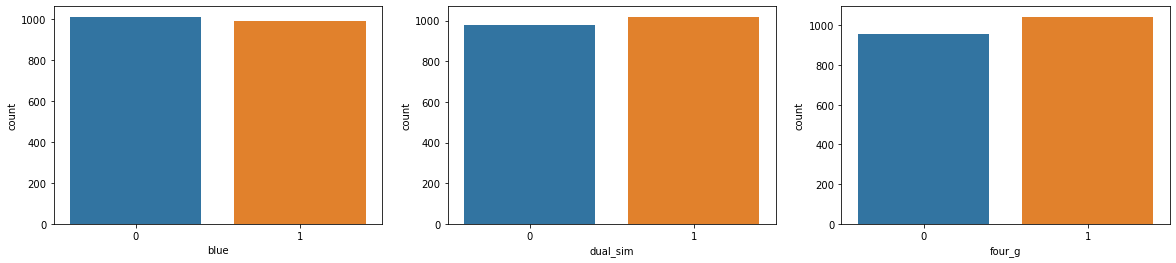

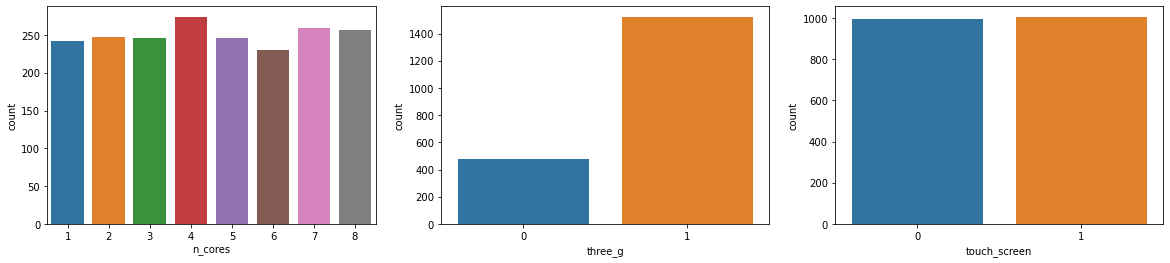

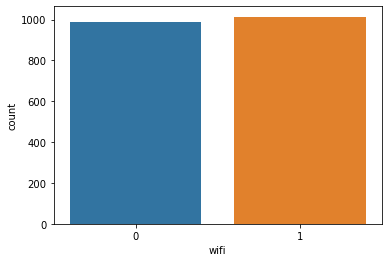

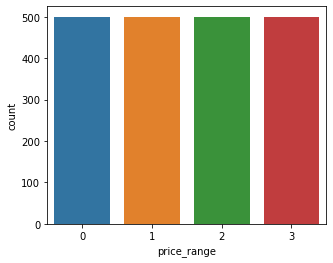

In [199]:
Categorical = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

i = 0
while i < 8:
    fig = plt.figure(figsize = (20, 4))
    plt.subplot(1,3,1)                             # 1 row, 3 plot , first one
    sns.countplot(x = Categorical[i], data = df)   #read each one from data
    i+=1
    if i == 7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x = Categorical[i], data = df)  # row one , second plot
    i+=1
    plt.subplot(1,3,3)
    sns.countplot(x = Categorical[i], data = df)
    i+=1
    plt.show()
    
plt.figure(figsize = (5,4))
sns.countplot(x = df['price_range'], data = df)
plt.show()

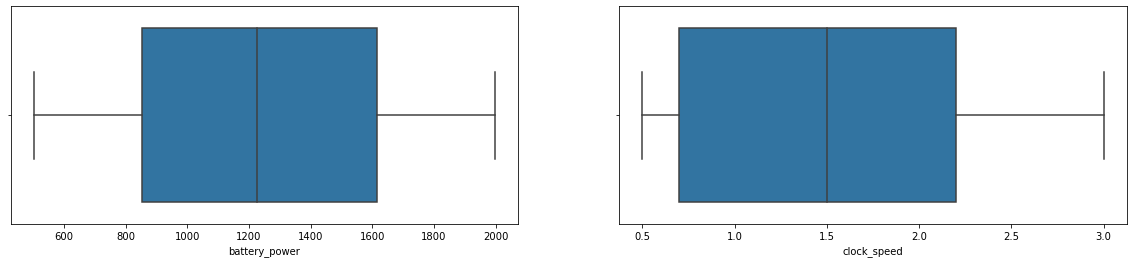

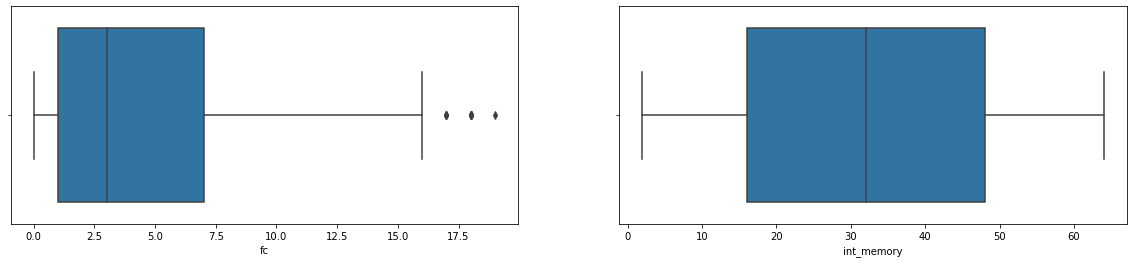

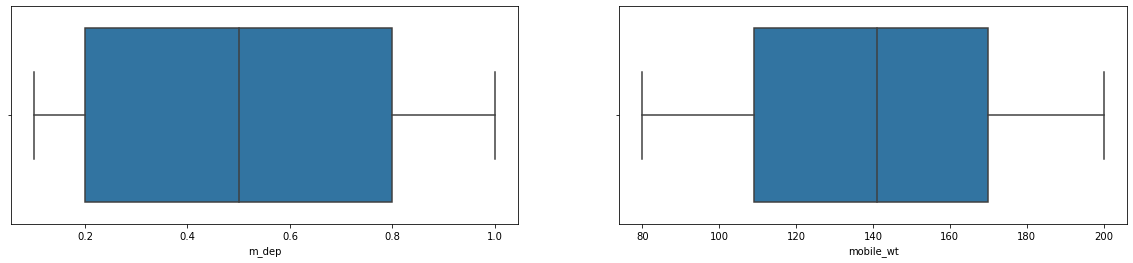

In [200]:
num = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt']

i = 0
while i<6:
    fig = plt.figure(figsize = (20, 4))
    plt.subplot(1,2,1)                    # one row , 2 plot , first one
    sns.boxplot(x = num[i], data = df)
    i+=1
    plt.subplot(1,2,2)
    sns.boxplot(x = num[i], data = df)   # row one second plot
    i+=1
    plt.show()

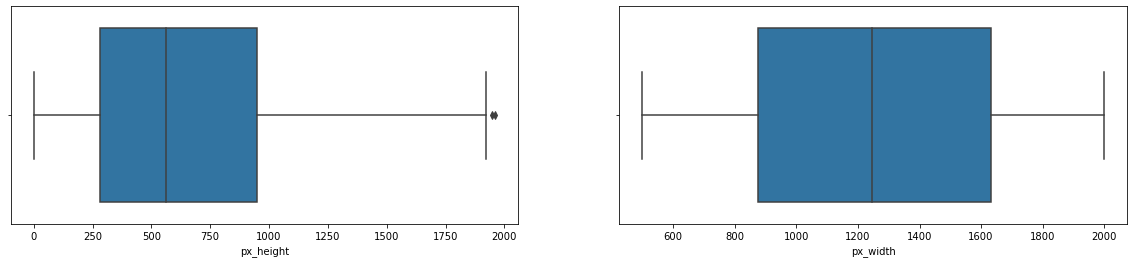

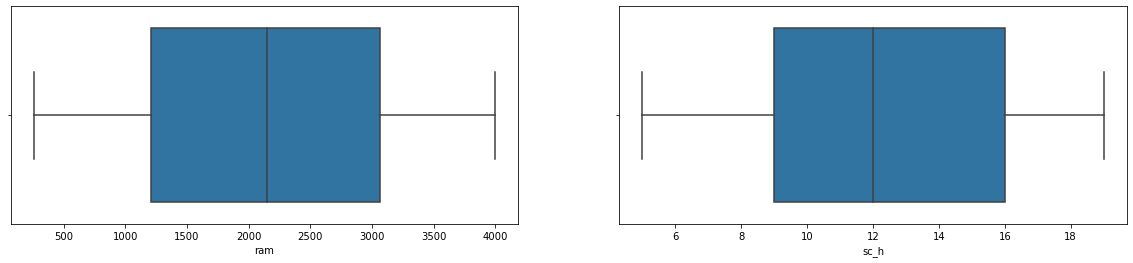

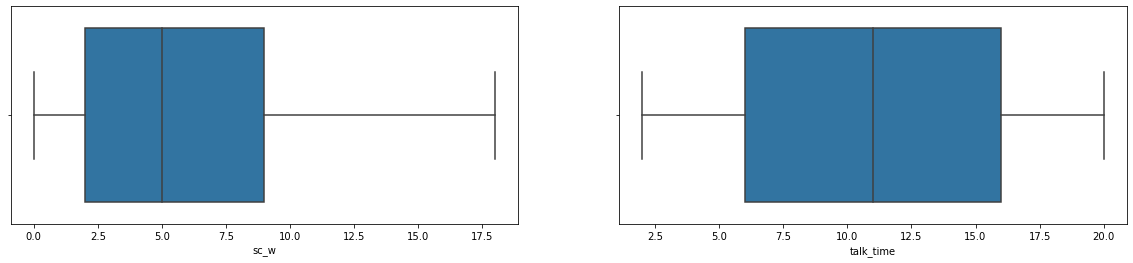

In [201]:
num = ['px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

i = 0
while i<6:
    fig = plt.figure(figsize = (20, 4))
    plt.subplot(1,2,1)                    # one row , 2 plot , first one
    sns.boxplot(x = num[i], data = df)
    i+=1
    plt.subplot(1,2,2)
    sns.boxplot(x = num[i], data = df)   # row one second plot
    i+=1
    plt.show()

In [202]:
print(df[df['px_height']==0].index)

Int64Index([1481, 1933], dtype='int64')


In [203]:
print(df[df['sc_w']==0].index)

Int64Index([  12,   24,   33,   42,   50,   54,   62,   73,   86,  119,
            ...
            1865, 1872, 1875, 1877, 1893, 1918, 1920, 1946, 1954, 1981],
           dtype='int64', length=180)


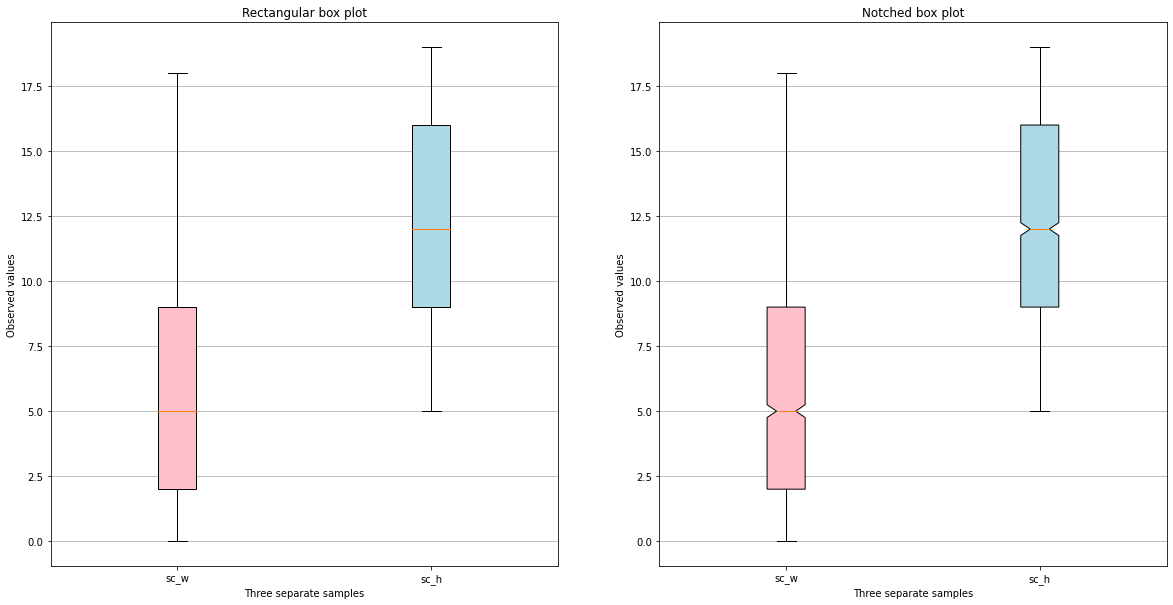

In [204]:
# Random test data
x = pd.DataFrame(df, columns = ['sc_w', 'sc_h'])
labels = ['sc_w', 'sc_h']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# rectangular box plot
bplot1 = ax1.boxplot(x,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(x,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

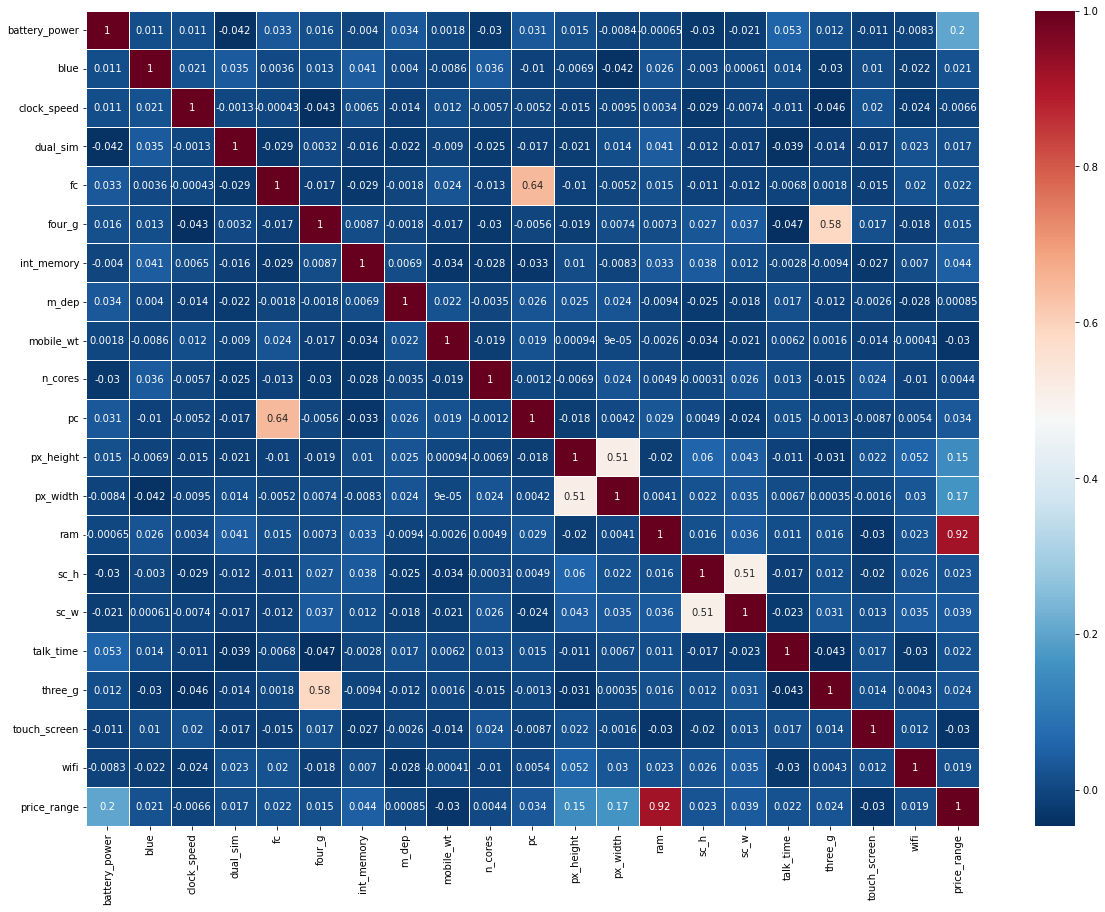

In [205]:
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df.corr(), cmap = 'RdBu_r', cbar = True, annot = True, linewidths = 0.5, ax = ax)
plt.show()

In [206]:
#--------------------########---DecisionTreeClassifier---########---------------------#

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [208]:
x = pd.DataFrame(df, columns = ['battery_power','blue', 'clock_speed','dual_sim','fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'])
y = df.price_range.values.reshape(-1, 1) 

In [209]:
# this function take data and test size next get x train x tes y train y test

def DTree(X,y,Testsize):
    df_evaluation = pd.DataFrame()
    for x in Testsize :
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = x, random_state = 0)
        clf = DecisionTreeClassifier(max_depth = 3)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        dict = {'Test_size' : x, 'acc' : metrics.accuracy_score(y_test,y_pred), "score" : clf.score(X,y)}
        df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return(X_train, X_test, y_train, y_test,df_evaluation)

In [210]:
df_r = df
x = df_r.drop(columns = ['price_range'])
y = df_r['price_range']

In [211]:
X_train, X_test, y_train, y_test, df_evaluation = DTree(x,y,[0.1,0.15,0.2,0.25,0.3,4])
df_evaluation

,Test_size,acc,score
0,0.10,0.775000,0.7695
1,0.15,0.766667,0.7725
2,0.20,0.757500,0.7705
3,0.25,0.764000,0.7720
4,0.30,0.748333,0.7720
5,4.00,0.750000,0.7695


In [212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [213]:
clf = DecisionTreeClassifier(max_depth = 8, splitter = "best", criterion = "gini", class_weight = "balanced")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [214]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.86


In [215]:
confusion_matrix(y, clf.predict(x))

array([[483,  17,   0,   0],
       [  7, 474,  19,   0],
       [  0,  12, 480,   8],
       [  0,   0,  12, 488]], dtype=int64)

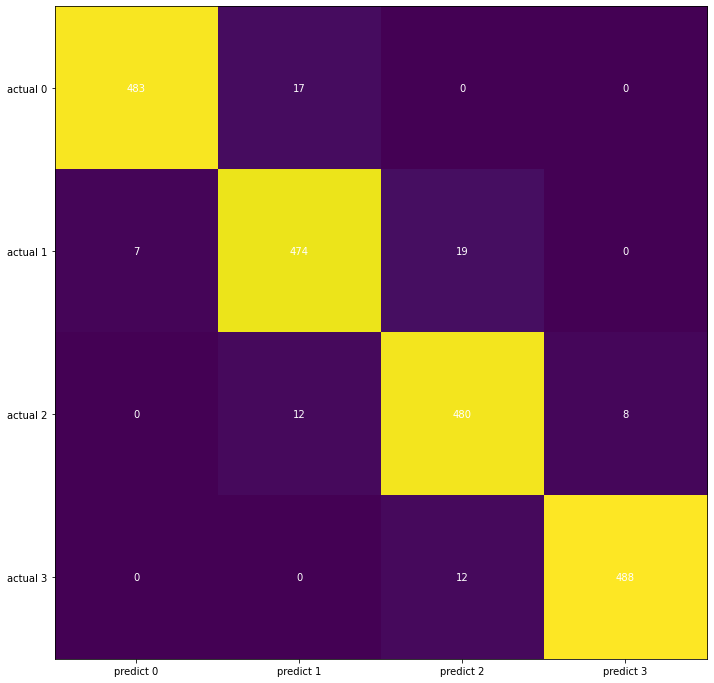

In [216]:
cm = confusion_matrix(y, clf.predict(x))

fig, ax = plt.subplots(figsize =(12,12))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1,2,3), ticklabels = ('predict 0', 'predict 1', 'predict 2', 'predict 3'))
ax.yaxis.set(ticks = (0,1,2,3), ticklabels = ('actual 0', 'actual 1', 'actual 2', 'actual 3'))
ax.set_ylim(3.5, -0.5)

for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
        
plt.show()

In [217]:
print(classification_report(y, clf.predict(x)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       500
           1       0.94      0.95      0.95       500
           2       0.94      0.96      0.95       500
           3       0.98      0.98      0.98       500

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [218]:
k_fold = KFold(5)
print(cross_val_score(clf, x, y.ravel(), cv = k_fold, n_jobs=1))

[0.84   0.825  0.8425 0.8175 0.8375]


In [219]:
from sklearn import tree 
from sklearn.datasets import load_iris

In [220]:
text_representaion = tree.export_text(clf)
print(text_representaion)

|--- feature_13 <= 2235.50
|   |--- feature_13 <= 1106.00
|   |   |--- feature_11 <= 1449.00
|   |   |   |--- feature_0 <= 1804.50
|   |   |   |   |--- feature_13 <= 1052.50
|   |   |   |   |   |--- feature_6 <= 63.50
|   |   |   |   |   |   |--- feature_11 <= 962.00
|   |   |   |   |   |   |   |--- feature_16 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_16 >  2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_11 >  962.00
|   |   |   |   |   |   |   |--- feature_0 <= 1684.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  1684.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  63.50
|   |   |   |   |   |   |--- feature_12 <= 992.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_12 >  992.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_13 >  1052.50
|   |   |   |  

In [221]:
from sklearn.datasets import load_iris

In [222]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

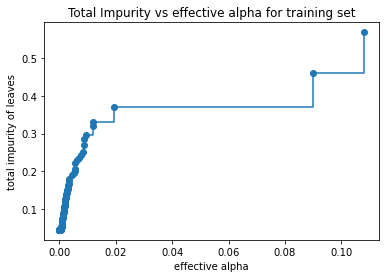

In [223]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

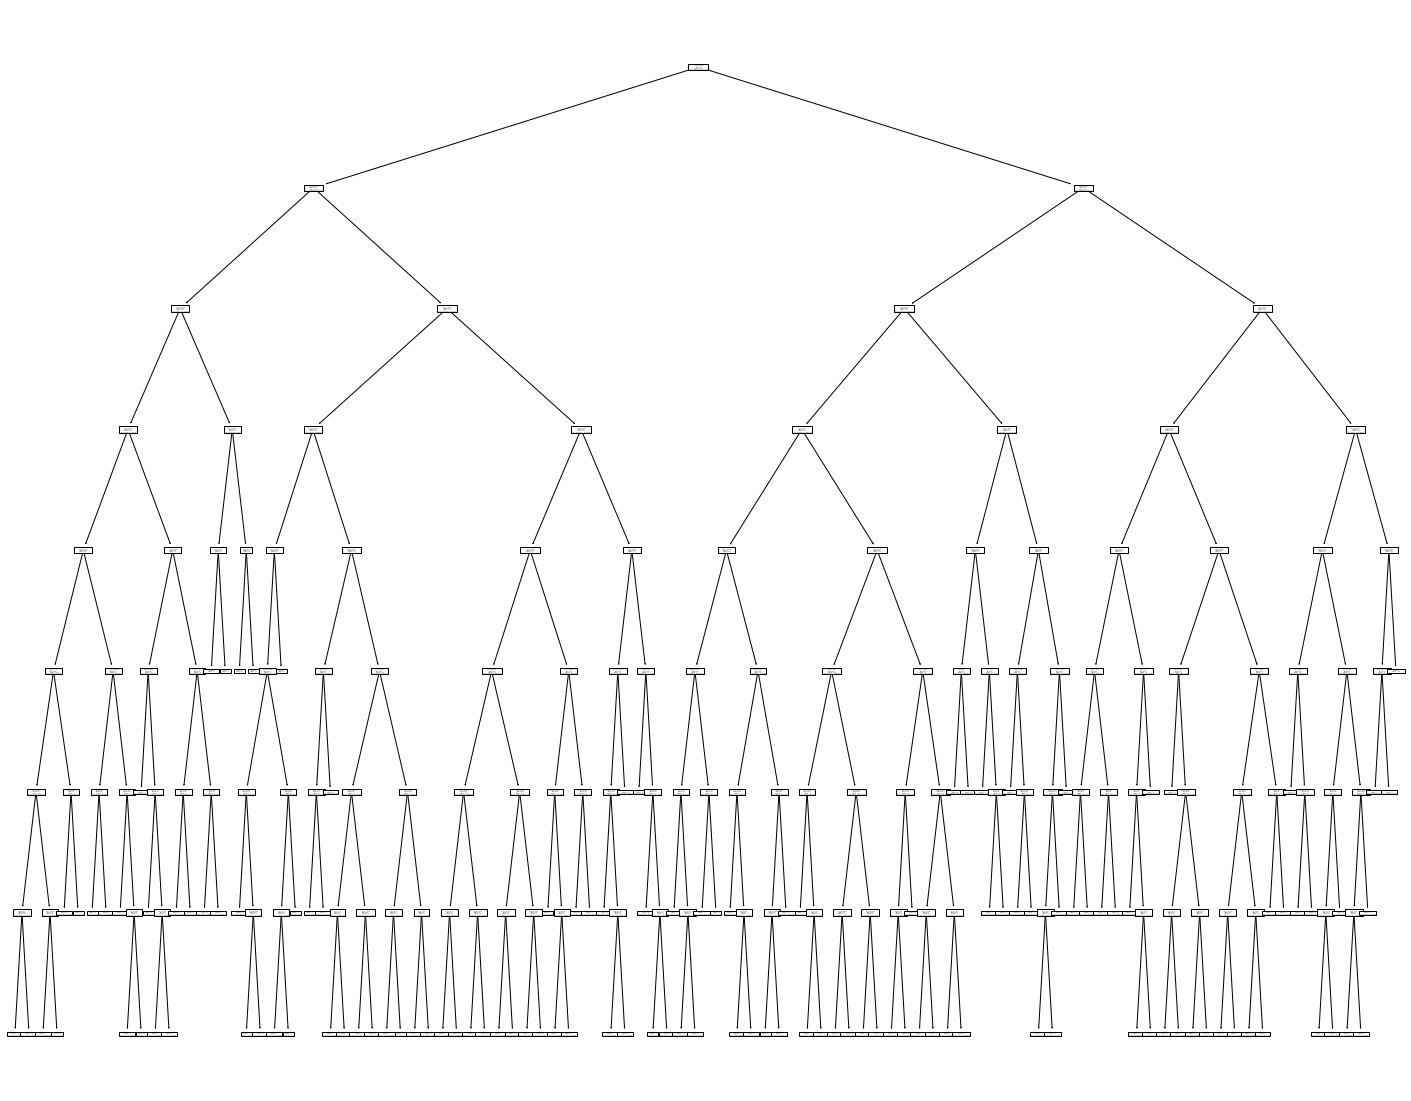

In [224]:
plt.figure(figsize = (25, 20))
tree.plot_tree(clf)
plt.show()

In [225]:
#--------------------########---RandomForestClassifier---########---------------------#

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [227]:
x1 = pd.DataFrame(df, columns = ['battery_power','blue', 'clock_speed','dual_sim','fc', 'four_g', 'int_memory', 'm_dep', 
                                 'mobile_wt', 'n_cores', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                                 'touch_screen', 'wifi'])
y1 = df.price_range.values.reshape(-1, 1) 

In [228]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.1, random_state = 1)

In [229]:
clf1 = RandomForestClassifier(n_estimators = 50, max_depth = 10, criterion = "gini", bootstrap = bool, random_state = 0)
clf1.fit(x_train1, y_train1)
y_pred1 = clf1.predict(x_test1)

In [230]:
print("Accuracy : ", metrics.accuracy_score(y_test1, y_pred1))

Accuracy :  0.87


In [231]:
confusion_matrix(y1, clf1.predict(x1))

array([[493,   7,   0,   0],
       [  3, 487,  10,   0],
       [  0,  11, 488,   1],
       [  0,   0,   3, 497]], dtype=int64)

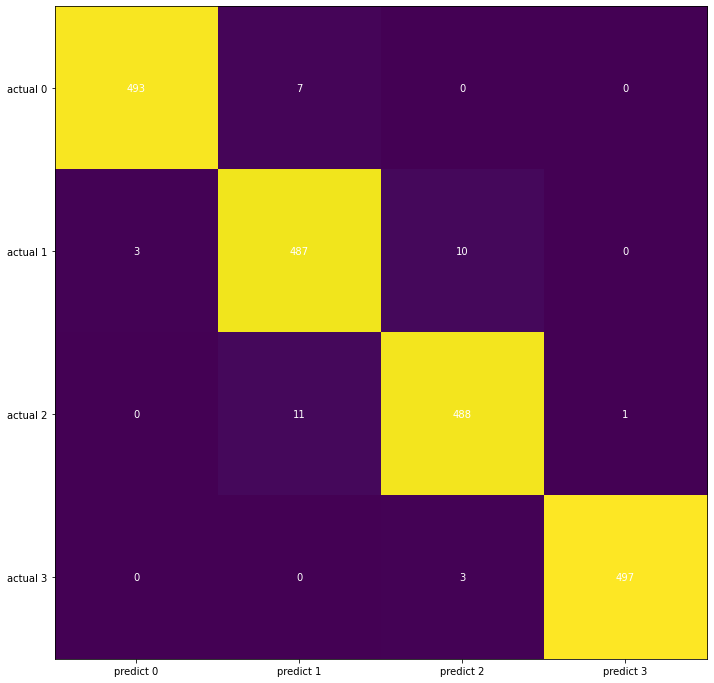

In [232]:
cm = confusion_matrix(y1, clf1.predict(x1))

fig, ax = plt.subplots(figsize =(12,12))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1,2,3), ticklabels = ('predict 0', 'predict 1', 'predict 2', 'predict 3'))
ax.yaxis.set(ticks = (0,1,2,3), ticklabels = ('actual 0', 'actual 1', 'actual 2', 'actual 3'))
ax.set_ylim(3.5, -0.5)

for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
        
plt.show()

In [233]:
print(classification_report(y1, clf1.predict(x1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.96      0.97      0.97       500
           2       0.97      0.98      0.98       500
           3       1.00      0.99      1.00       500

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [234]:
k_fold = KFold(5)
print(cross_val_score(clf1, x1, y1.ravel(), cv = k_fold, n_jobs=1))

[0.8725 0.8425 0.8625 0.88   0.86  ]


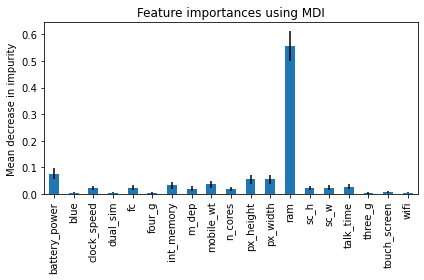

In [235]:
# Feature importances with a forest of trees

feature_names = ['battery_power','blue', 'clock_speed','dual_sim','fc', 'four_g', 'int_memory', 'm_dep', 
                                 'mobile_wt', 'n_cores', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                                 'touch_screen', 'wifi']
importances = clf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf1.estimators_], axis=0)

clf1_importances = pd.Series(importances, index=feature_names)


fig, ax = plt.subplots()
clf1_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

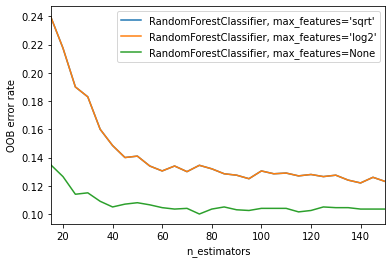

In [236]:
from collections import OrderedDict
from sklearn.datasets import make_classification

RANDOM_STATE = 123

# error trajectory during training.
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(x1, y1)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [237]:
#--------------------########---SVM---########---------------------#

In [238]:
from sklearn import svm

In [239]:
x2 = pd.DataFrame(df, columns = ['battery_power','blue', 'clock_speed','dual_sim','fc', 'four_g', 'int_memory', 'm_dep',
                                 'mobile_wt', 'n_cores', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                                 'touch_screen', 'wifi'])
y2 = df.price_range.values.reshape(-1, 1) 

In [240]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.1, random_state = 0)

In [241]:
clf2 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001,
               cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False,
               random_state=0)
clf2.fit(x_train2, y_train2)
y_pred2 = clf2.predict(x_test2)

In [242]:
print("Accuracy : ", metrics.accuracy_score(y_test2, y_pred2))

Accuracy :  0.975


In [243]:
confusion_matrix(y2, clf2.predict(x2))

array([[500,   0,   0,   0],
       [  0, 492,   8,   0],
       [  0,   6, 490,   4],
       [  0,   0,   4, 496]], dtype=int64)

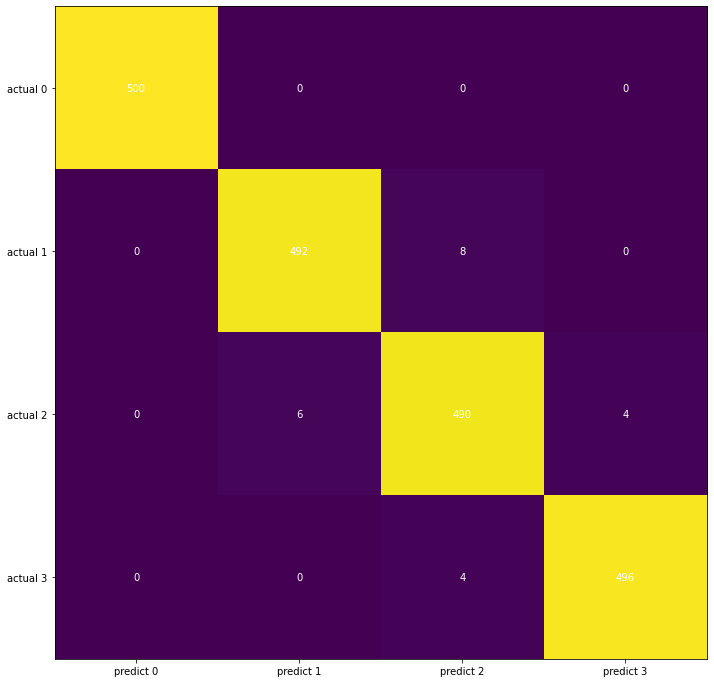

In [244]:
cm = confusion_matrix(y2, clf2.predict(x2))

fig, ax = plt.subplots(figsize =(12,12))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1,2,3), ticklabels = ('predict 0', 'predict 1', 'predict 2', 'predict 3'))
ax.yaxis.set(ticks = (0,1,2,3), ticklabels = ('actual 0', 'actual 1', 'actual 2', 'actual 3'))
ax.set_ylim(3.5, -0.5)

for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
        
plt.show()

In [245]:
print(classification_report(y2, clf2.predict(x2)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.99      0.98      0.99       500
           2       0.98      0.98      0.98       500
           3       0.99      0.99      0.99       500

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [246]:
k_fold = KFold(5)
print(cross_val_score(clf2, x2, y2.ravel(), cv = k_fold, n_jobs=1))

[0.975  0.965  0.97   0.9725 0.9775]


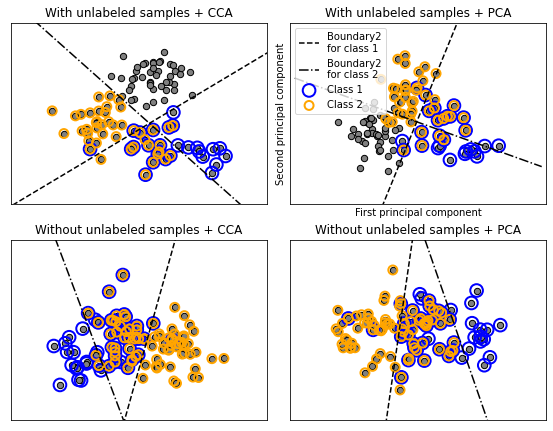

In [248]:
# Authors: Vlad Niculae, Mathieu Blondel
# License: BSD 3 clause

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hy2perplane(clf2, min_x2, max_x2, linesty2le, label):
    # get the separating hy2perplane
    w = clf2.coef_[0]
    a = -w[0] / w[1]
    x2x2 = np.linspace(min_x2 - 5, max_x2 + 5)  # make sure the line is long enough
    y2y2 = a * x2x2 - (clf2.intercept_[0]) / w[1]
    plt.plot(x2x2, y2y2, linesty2le, label=label)


def plot_subfigure(x2, y2, subplot, title, transform):
    if transform == "pca":
        x2 = PCA(n_components=2).fit_transform(x2)
    elif transform == "cca":
        x2 = CCA(n_components=2).fit(x2, y2).transform(x2)
    else:
        raise ValueError

    min_x2 = np.min(x2[:, 0])
    max_x2 = np.max(x2[:, 0])

    min_y2 = np.min(x2[:, 1])
    max_y2 = np.max(x2[:, 1])

    classif = OneVsRestClassifier(svm.SVC(kernel="linear"))
    classif.fit(x2, y2)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(y2[:, 0])
    one_class = np.where(y2[:, 1])
    plt.scatter(x2[:, 0], x2[:, 1], s=40, c="gray", edgecolors=(0, 0, 0))
    plt.scatter(
        x2[zero_class, 0],
        x2[zero_class, 1],
        s=160,
        edgecolors="b",
        facecolors="none",
        linewidths=2,
        label="Class 1",
    )
    plt.scatter(
        x2[one_class, 0],
        x2[one_class, 1],
        s=80,
        edgecolors="orange",
        facecolors="none",
        linewidths=2,
        label="Class 2",
    )

    plot_hy2perplane(
        classif.estimators_[0], min_x2, max_x2, "k--", "Boundary2\nfor class 1"
    )
    plot_hy2perplane(
        classif.estimators_[1], min_x2, max_x2, "k-.", "Boundary2\nfor class 2"
    )
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x2 - 0.5 * max_x2, max_x2 + 0.5 * max_x2)
    plt.ylim(min_y2 - 0.5 * max_y2, max_y2 + 0.5 * max_y2)
    if subplot == 2:
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

x22, y22 = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=True, random_state=1
)

plot_subfigure(x22, y22, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(x22, y22, 2, "With unlabeled samples + PCA", "pca")

x22, y22 = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=False, random_state=1
)

plot_subfigure(x22, y22, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(x22, y22, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(0.04, 0.02, 0.97, 0.94, 0.09, 0.2)
plt.show()


In [249]:
#--------------####### dimension #######----------------#

In [250]:
def Replace(dataframe):
    dataframe = df.copy()
    dataframe['blue'].replace([0,1],[3,4], inplace = True)
    dataframe['dual_sim'].replace([0,1],[3,4], inplace = True)
    dataframe['four_g'].replace([0,1],[3,4], inplace = True)
    dataframe['n_cores'].replace([1,2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9], inplace = True)
    dataframe['three_g'].replace([0,1],[3,4], inplace = True)
    dataframe['touch_screen'].replace([0,1],[3,4], inplace = True)
    dataframe['wifi'].replace([0,1],[3,4], inplace = True)
    return dataframe

In [251]:
x_new = pd.DataFrame(Replace(df), columns = ['battery_power','blue', 'clock_speed','dual_sim','fc', 'four_g', 'int_memory', 'm_dep',
                                 'mobile_wt', 'n_cores', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                                 'touch_screen', 'wifi'])
y_new = Replace(df).price_range.values.reshape(-1, 1) 


In [252]:
def check(Dimension,testsize):
    acc = 0.975
    for column in x:
        new_col_name = column + str(Dimension)
        new_col_val = x[column]**Dimension
        x.insert(0, new_col_name, new_col_val)
        X_train, X_test, Y_train, Y_test = train_test_split(x_new, y_new, test_size = 0.1, random_state = 0)
        new_model = svm.SVC(random_state=0)
        new_model.fit(X_train, Y_train)
        Y_pred = new_model.predict(X_test)
        acc_new = metrics.accuracy_score(Y_test, Y_pred)
        if acc_new < acc:
            x.drop([new_col_name], axis=1, inplace=True)
        else:
            acc = acc_new
    print("acc : ",acc)

check(2,0.2)

acc :  0.975


In [262]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [253]:
#------------------####### New Data #######--------------------#

In [254]:
data2 = pd.read_csv('D://D/ماشین لرنینگ/test.csv')
df2 = pd.DataFrame(data2)
data3 = df.append(df2)
data3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,997.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,998.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


In [255]:
data3.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
id               2000
dtype: int64

In [256]:
data3.drop(columns = ["id"],inplace = True)
data3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,NaN
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,NaN
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,NaN
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,NaN


In [257]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [258]:
x_train3 = data3.drop(columns = ['price_range'])[:2000]
y_train3 = data3['price_range'][:2000]
x_test3 = data3.drop(columns = ['price_range'])[2000:]

In [259]:
clf3 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001,
               cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False,
               random_state=0)
clf3.fit(x_train3, y_train3)
y_pred3 = clf3.predict(x_test3)

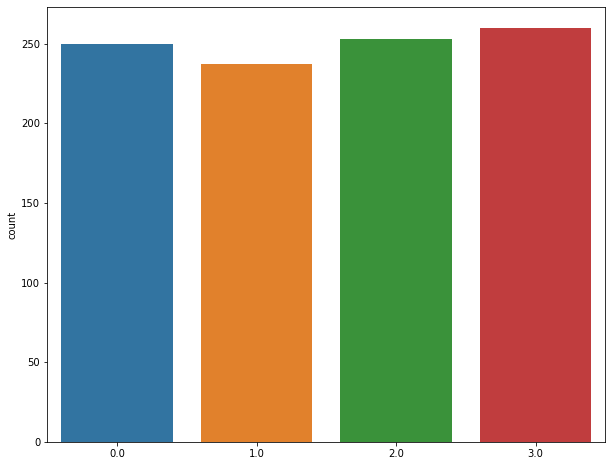

In [260]:
plt.figure(figsize = (10,8))
sns.countplot(y_pred3, data = data3)
plt.show()